In [14]:
import onnx
import onnxruntime as rt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import time

# Load the ONNX model
model = onnx.load("model_v2.onnx")

# Check that the IR is well formed
onnx.checker.check_model(model)

In [15]:
# Print a human readable representation of the graph
onnx.helper.printable_graph(model.graph)

'graph torch_jit (\n  %input.1[FLOAT, 1x3x48x48]\n) initializers (\n  %conv1.0.weight[FLOAT, 32x3x3x3]\n  %conv1.2.weight[FLOAT, 32]\n  %conv1.2.bias[FLOAT, 32]\n  %conv1.2.running_mean[FLOAT, 32]\n  %conv1.2.running_var[FLOAT, 32]\n  %conv1.3.weight[FLOAT, 32x32x3x3]\n  %conv1.5.weight[FLOAT, 32]\n  %conv1.5.bias[FLOAT, 32]\n  %conv1.5.running_mean[FLOAT, 32]\n  %conv1.5.running_var[FLOAT, 32]\n  %conv2.0.weight[FLOAT, 64x32x3x3]\n  %conv2.2.weight[FLOAT, 64]\n  %conv2.2.bias[FLOAT, 64]\n  %conv2.2.running_mean[FLOAT, 64]\n  %conv2.2.running_var[FLOAT, 64]\n  %conv2.3.weight[FLOAT, 64x64x3x3]\n  %conv2.5.weight[FLOAT, 64]\n  %conv2.5.bias[FLOAT, 64]\n  %conv2.5.running_mean[FLOAT, 64]\n  %conv2.5.running_var[FLOAT, 64]\n  %conv3.0.weight[FLOAT, 128x64x3x3]\n  %conv3.2.weight[FLOAT, 128]\n  %conv3.2.bias[FLOAT, 128]\n  %conv3.2.running_mean[FLOAT, 128]\n  %conv3.2.running_var[FLOAT, 128]\n  %conv3.3.weight[FLOAT, 128x128x3x3]\n  %conv3.5.weight[FLOAT, 128]\n  %conv3.5.bias[FLOAT, 128]\

In [16]:
# Load the ONNX model
sess = rt.InferenceSession("model.onnx")

In [17]:
# Get input and output names
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

print("Input name: ",input_name)
print("Output name: ",output_name)

Input name:  input.1
Output name:  186


In [18]:
classes = ['fear', 'angry', 'sad', 'neutral', 'surprise', 'disgust', 'happy']

Time taken:  0.002482175827026367
Predicted emotion:  surprise


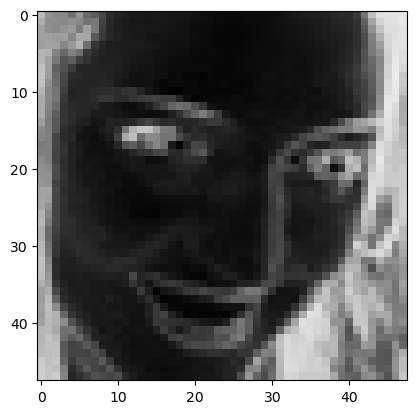

In [19]:
# Load the image
img = cv2.imread("test3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (48,48))
img = img.astype(np.float32)
img = np.transpose(img, (2,0,1))
img = np.expand_dims(img, axis=0)

# Run the model on the image
start = time.time()
pred_onx = sess.run([output_name], {input_name: img})[0]
end = time.time()
print("Time taken: ",end-start)

# Print the result
print("Predicted emotion: ", classes[np.argmax(pred_onx)])

# Convert the image data back to the original range of 0-255
img_to_show = img[0].transpose(1, 2, 0).copy()
img_to_show *= 255
img_to_show = img_to_show.astype(np.uint8)

# Normalize the image data to the range of 0-1
img_to_show = img_to_show / 255.0

# Plot the image
plt.imshow(img_to_show)
plt.show()

In [20]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (48, 48))
    
    # Convert to grayscale and then back to 3-channel image
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.cvtColor(frame_gray, cv2.COLOR_GRAY2BGR)
    
    frame = np.transpose(frame, (2, 0, 1))
    frame = np.expand_dims(frame, axis=0)
    frame = frame.astype(np.float32)
    frame = frame / 255.0
    start = time.time()
    pred_onx = sess.run([output_name], {input_name: frame})
    end = time.time()
    print("Time taken by onnx model: ", end - start)
    print("Emotion: ", classes[np.argmax(pred_onx)])
    
    cv2.imshow("frame", frame_gray)  # Display the grayscale frame
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


Time taken by onnx model:  0.00395965576171875
Emotion:  happy
Time taken by onnx model:  0.001332998275756836
Emotion:  happy
Time taken by onnx model:  0.0019059181213378906
Emotion:  neutral
Time taken by onnx model:  0.0018057823181152344
Emotion:  neutral
Time taken by onnx model:  0.0017037391662597656
Emotion:  neutral
Time taken by onnx model:  0.0016129016876220703
Emotion:  neutral
Time taken by onnx model:  0.001984119415283203
Emotion:  happy
Time taken by onnx model:  0.0015058517456054688
Emotion:  happy
Time taken by onnx model:  0.0014982223510742188
Emotion:  happy
Time taken by onnx model:  0.0019009113311767578
Emotion:  happy
Time taken by onnx model:  0.0015971660614013672
Emotion:  neutral
Time taken by onnx model:  0.0015974044799804688
Emotion:  neutral
Time taken by onnx model:  0.001489877700805664
Emotion:  happy
Time taken by onnx model:  0.0014188289642333984
Emotion:  happy
Time taken by onnx model:  0.0015149116516113281
Emotion:  happy
Time taken by onnx